In [65]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.DataFrame()
df

np.random.seed= 5100

In [49]:
#The ID feature is a unique identifier for each sample. The identifier has the form IDxxx where x is a three digit number
#gen ID feature:
ID = ['ID' + str(count).zfill(3) for count in range(1, 801)]
print(ID[:10])

['ID001', 'ID002', 'ID003', 'ID004', 'ID005', 'ID006', 'ID007', 'ID008', 'ID009', 'ID010']


In [50]:
#The Group feature is either A, B, or C. Roughly a third of each sample lies in each group.
#gen group feature:
group = np.random.choice(['A', 'B', 'C'], size=800,p=[1/3,1/3,1/3])
#group

In [51]:
#Feature_1 is sampled randomly from a normal distribution with mean 2500. About 66% of the data falls between 2200 and 2800
#gen feature 1:
feature_1 = np.random.normal(2500, 300, 800)
#feature_1

In [52]:
#Feature_2 is sampled randomly from a normal distribution with mean 400 and standard deviation 15.
#gen feature 2:
feature_2 = np.random.normal(400,15,800)

In [53]:
df = pd.DataFrame({'ID': ID, 'Group': group, 'Feature_1': feature_1, 'Feature_2': feature_2})
df.head()

,ID,Group,Feature_1,Feature_2
0,ID001,A,2271.633816,405.759941
1,ID002,C,1981.060658,390.586930
2,ID003,C,2632.633773,386.629261
3,ID004,B,2265.923681,392.719262
4,ID005,B,2633.822366,387.503389


In [54]:
#Feature_3 depends on the Group feature. For A, Feature_3 is approximately 3(Feature_1)-5(Feature_2). 
#For B, Feature_3 is approximately 2(Feature_1). For C, Feature_3 is approximately -(Feature_1)+(Feature_2). 
#In each of cases A, B, and C the difference between Feature_3 and the value given by the formula is a normally distributed random variable
# with mean 0 and standard deviation 1 

randomize = np.random.normal(0, 12, 800)

feature_3_a = (3 * feature_1) - (5 * feature_2) + randomize
feature_3_b = (2 * feature_1) + randomize
feature_3_c = (-feature_1 + feature_2) + randomize

feature_3 = np.where(group == 'A', feature_3_a, np.where(group == 'B', feature_3_b, feature_3_c))

df['Feature_3'] = feature_3
df.sample(5)

,ID,Group,Feature_1,Feature_2,Feature_3
226,ID227,A,2800.584729,394.559061,6444.447347
481,ID482,C,2943.384655,426.918269,-2495.363828
388,ID389,B,1958.573871,384.221248,3911.026676
405,ID406,A,2461.416269,386.800215,5434.930514
287,ID288,A,2962.436277,382.514390,6989.663341


In [64]:
#2. Answer the following questions:

#a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is 
#greater than 3000?

    #Ans: The value 3000 is within 2 standard deviations of the mean 2500, which is the area 95% of the samples will fall. Roughly 16% of the
    #samples will be greater than the higher range of one standard deviation, and about 2.5% greater than the higher range of two standard
    #deviations. Because the z-score of 3000 puts it at almost 2 standard deviations above the mean, I would expect more like 5% of the values
    #to be greater than 3000, which is about 40 values.

#b.  How many samples did you actually find where Feature_1 is greater than 3000?
print("Number of samples where Feature_1 is greater than 3000: ",np.sum((df['Feature_1']>3000)),"\n")

#c. Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group
print("Mean of Feature_3 within each group:\n",df.groupby('Group').mean()['Feature_3'])
print("Standard deviation of feature_3 within each group:\n",df.groupby('Group').std()['Feature_3'])

Number of samples where Feature_1 is greater than 3000:  42 

Mean of Feature_3 within each group:
 Group
A    5407.771680
B    5011.637792
C   -2094.815882
Name: Feature_3, dtype: float64
Standard deviation of feature_3 within each group:
 Group
A    906.155817
B    602.504201
C    318.580195
Name: Feature_3, dtype: float64


/var/folders/6t/8gmdsscx139d24rs_nnb24g40000gn/T/ipykernel_4074/391942534.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean of Feature_3 within each group:\n",df.groupby('Group').mean()['Feature_3'])
/var/folders/6t/8gmdsscx139d24rs_nnb24g40000gn/T/ipykernel_4074/391942534.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Standard deviation of feature_3 within each group:\n",df.groupby('Group').std()['Feature_3'])


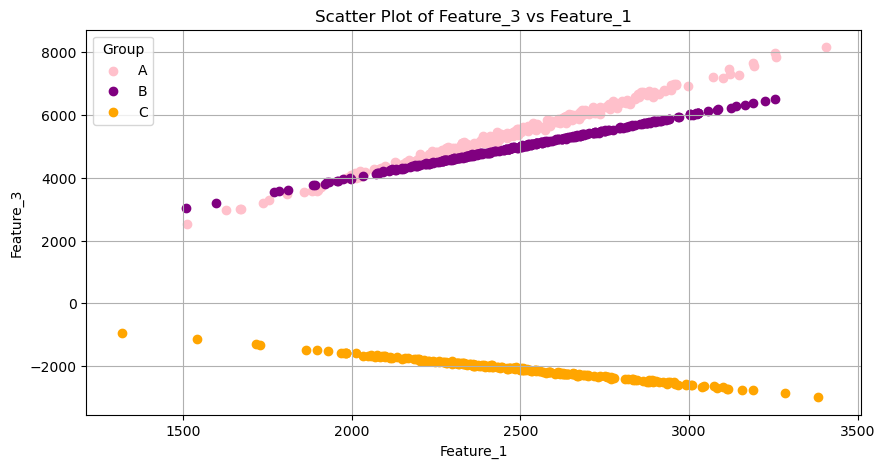

In [73]:
#3. Make a scatterplot of Feature_3 vs Feature_1.

fig = plt.figure(figsize=(10, 5))

axes = fig.add_subplot(1, 1, 1)
axes.grid(True)
axes.set_xlabel("Feature_1")
axes.set_ylabel("Feature_3")
axes.set_title("Scatter Plot of Feature_3 vs Feature_1")

A = df[df['Group']=='A']
B = df[df['Group']=='B']
C = df[df['Group']=='C']

A_plot = axes.scatter(
    x=A["Feature_1"], y=A["Feature_3"], c="pink", label="A"
)
B_plot = axes.scatter(
    x=B["Feature_1"], y=B["Feature_3"], c="purple", label="B"
)
C_plot = axes.scatter(
    x=C["Feature_1"], y=C["Feature_3"], c="orange", label="C"
)

axes.legend(["A", "B","C"],title="Group")

In [72]:
#4. Write your constructed dataframe/tibble to a csv file called fake_data.csv

filename = 'fake_data.csv'
df.to_csv(filename, sep=',', index=False, encoding='utf-8')